In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from zipfile import ZipFile

## Read and Prepare Data

In [2]:
PATH = "/content/clustering_data.zip"

with ZipFile(PATH, "r") as zf:
  print("Dir List: ")
  zf.printdir()

  print("\nExtracting zip files...")
  zf.extractall()
  print("Done!")

Dir List: 
File Name                                             Modified             Size
clustered_anime.csv                            2022-05-02 20:42:20      1619564
enjoyed_animes_user.csv                        2022-05-02 20:46:46    314440181

Extracting zip files...
Done!


In [4]:
PATH_CLUSTERED_ANIME = "/content/clustered_anime.csv"
clustered_anime_df = pd.read_csv(PATH_CLUSTERED_ANIME, index_col=0)
clustered_anime_df.head()

,AnimeName,ClusterType,Point
0,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hat...,1,0.014119
1,&quot;Bungaku Shoujo&quot; Memoire,1,0.011198
2,&quot;Bungaku Shoujo&quot; Movie,1,0.023856
3,&quot;Eiji&quot;,1,0.000487
4,.hack//G.U. Returner,1,0.013632


In [5]:
print("Shape of data: ", clustered_anime_df.shape)
print("*" * 10)
print("Columns of data:\n", clustered_anime_df.columns)

Shape of data:  (31408, 3)
**********
Columns of data:
 Index(['AnimeName', 'ClusterType', 'Point'], dtype='object')


In [6]:
PATH_ENJOYED_ANIME = "/content/enjoyed_animes_user.csv"
enjoyed_anime_df = pd.read_csv(PATH_ENJOYED_ANIME, index_col=0)
enjoyed_anime_df.head()

,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,.hack//Liminality,...,iDOLM@STER Xenoglossia Specials,lilac (bombs Jun Togawa),makemagic,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,cluster_4
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [7]:
print("Shape of data: ", enjoyed_anime_df.shape)
print("*" * 10)
print("Columns of data:\n", enjoyed_anime_df.columns)

Shape of data:  (20000, 7853)
**********
Columns of data:
 Index(['&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi',
       '&quot;Bungaku Shoujo&quot; Memoire',
       '&quot;Bungaku Shoujo&quot; Movie', '&quot;Eiji&quot;',
       '.hack//G.U. Returner', '.hack//G.U. Trilogy',
       '.hack//G.U. Trilogy: Parody Mode', '.hack//Gift', '.hack//Intermezzo',
       '.hack//Liminality',
       ...
       'iDOLM@STER Xenoglossia Specials', 'lilac (bombs Jun Togawa)',
       'makemagic', 's.CRY.ed', 'xxxHOLiC', 'xxxHOLiC Kei',
       'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'xxxHOLiC Rou',
       'xxxHOLiC Shunmuki', 'cluster_4'],
      dtype='object', length=7853)


---
* Drop the cluster_4 column from enjoyed_anime_df, so that we will be able to apply one of the non-linear dimensional reduction techniques: t-SNE. In the previous notebook, PCA, linear dimenasional reduction technique, is applied. Let's see which one is more efficient.
---


In [8]:
df = enjoyed_anime_df.drop("cluster_4", axis=1)
df.head()

,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,.hack//Liminality,...,iDOLM@STER Xenoglossia,iDOLM@STER Xenoglossia Specials,lilac (bombs Jun Togawa),makemagic,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##t-distributed Stochastic Neighbor Embedding (t-SNE)

---


> t-SNE has some hyperparameters, unlike PCA. Some of them: perplexity, learning rate, number of steps. To effectively tune and use it, read this article:

[How to Use t-SNE Effectively](https://distill.pub/2016/misread-tsne/)

---




In [9]:
from sklearn.manifold import TSNE

In [12]:
# this cell took ~31 minutes to execute (1 hour in my case... just needed to run cell twice...)
# t-SNE is slower than PCA
# i will download embeddings in the sake of ending our suffering
# if you want to get embeddings, do not waste your time
# just download from [cuteopamp/anime-recommender/data/processed_data/tsne_embeddings.csv] 
tsne = TSNE(n_components=3)
tsne.fit_transform(df)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


array([[  0.4745428,  32.21364  ,   1.1583184],
       [ 29.378202 ,   0.7747137,   9.640356 ],
       [  7.089428 ,  10.383973 ,  18.575918 ],
       ...,
       [-11.882038 ,  -5.967111 ,  19.601528 ],
       [-15.189811 ,  18.319454 ,  -9.378494 ],
       [ -2.580793 ,  15.224579 ,  -4.009416 ]], dtype=float32)

In [19]:
# t-sne embeddings
tsne_embeds = tsne.embedding_
tsne_embeds

array([[  0.4745428,  32.21364  ,   1.1583184],
       [ 29.378202 ,   0.7747137,   9.640356 ],
       [  7.089428 ,  10.383973 ,  18.575918 ],
       ...,
       [-11.882038 ,  -5.967111 ,  19.601528 ],
       [-15.189811 ,  18.319454 ,  -9.378494 ],
       [ -2.580793 ,  15.224579 ,  -4.009416 ]], dtype=float32)

In [30]:
from numpy import savetxt
from google.colab import files

savetxt("/content/tsne_embededdings.csv", tsne_embeds, delimiter=",")
files.download("/content/tsne_embededdings.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
kl_div = tsne.kl_divergence_
kl_div

3.7378129959106445

In [29]:
print(f"For {str(tsne.n_iter)} iterations:\n")
print("Shape of t-sne embeddings: ", tsne_embeds.shape)
print("KL Divergence: ", kl_div)

For 1000 iterations:

Shape of t-sne embeddings:  (20000, 3)
KL Divergence:  3.7378129959106445


In [34]:
to_cluster = pd.DataFrame(tsne_embeds)
to_cluster

,0,1,2
0,0.474543,32.213638,1.158318
1,29.378202,0.774714,9.640356
2,7.089428,10.383973,18.575918
3,-11.399545,7.324552,-6.180433
4,36.485840,-2.416502,10.263251
...,...,...,...
19995,-19.984039,-18.416964,-16.770832
19996,24.939083,33.764915,10.156407
19997,-11.882038,-5.967111,19.601528
19998,-15.189811,18.319454,-9.378494


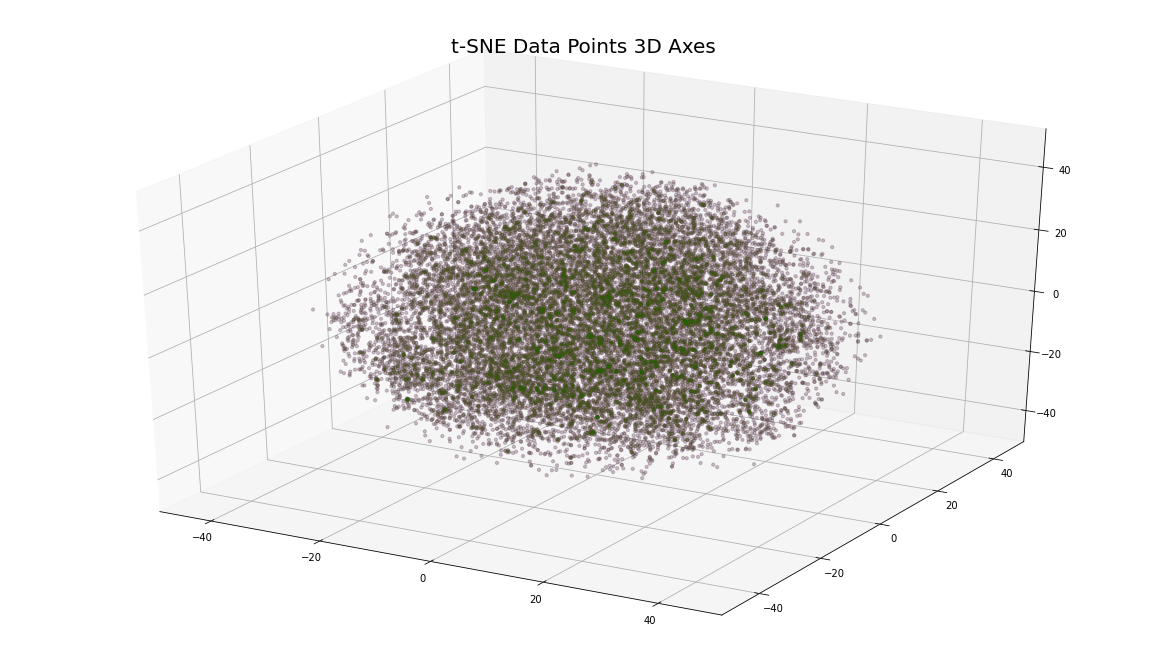

In [42]:
fig = plt.figure(figsize=(16, 9))

ax = Axes3D(fig)

colors = ["blue", "red", "green"]

for c in colors:
  ax.scatter(to_cluster[0], to_cluster[1], to_cluster[2], c=c, s=10, alpha=0.1)

plt.title("t-SNE Data Points 3D Axes", fontsize=20)

# save figure
plt.savefig("/content/tsne3d.png")
plt.show()

In [43]:
# download figure
files.download("/content/tsne3d.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Clustering with K-Means

In [44]:
from sklearn.cluster import KMeans
from sklearn.metrics  import silhouette_score

In [46]:
scores = list()
inertia_list = np.empty(8)

for i in range(2, 8):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(to_cluster)
  inertia_list[i] = kmeans.inertia_
  scores.append(silhouette_score(to_cluster, kmeans.labels_))

In [47]:
inertia_list

array([7.2000000e+00, 7.2000000e+00, 1.2698152e+07, 9.8684390e+06,
       8.0854810e+06, 6.9763110e+06, 5.9990810e+06, 5.4394460e+06])

In [48]:
scores

[0.24397661, 0.24797304, 0.25490037, 0.250002, 0.2612252, 0.25384277]

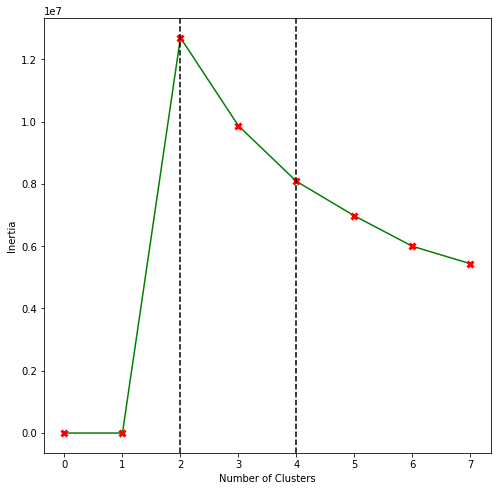

In [59]:
plt.figure(figsize=(8, 8))

plt.plot(range(8), inertia_list, "-x", color="green", markeredgecolor = "red", mew = 3)
plt.axvline(x=2, color="black", linestyle="--")
plt.axvline(x=4, color="black", linestyle="--")

plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

plt.show()

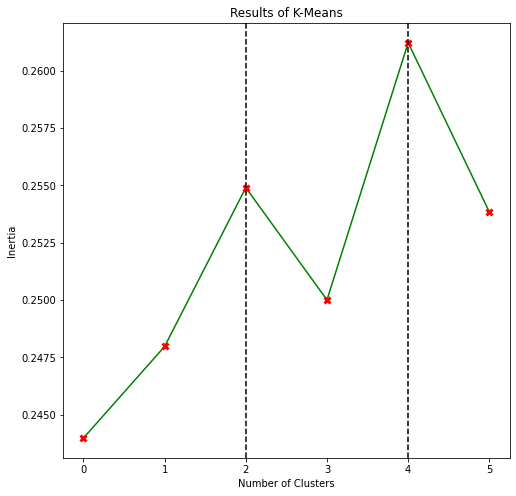

In [60]:
plt.figure(figsize=(8, 8))

plt.plot(range(len(scores)), scores, "-x", color = "green", markeredgecolor= "red", mew=3)
plt.axvline(x=2, color="black", linestyle="--")
plt.axvline(x=4, color="black", linestyle="--")

plt.title("Results of K-Means")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

plt.show()

---
* k=4 seems optimal. (This was also optimal in PCA model) Let's choose it.
---


In [61]:
cluster4 = KMeans(n_clusters=4, random_state=42)
cluster4.fit(to_cluster)

centers4 = cluster4.cluster_centers_
preds4 = cluster4.predict(to_cluster)

print("Centers for k=4 clusters:\n")
print(centers4)

Centers for k=4 clusters:

[[  4.7560945   3.108616   20.540743 ]
 [-14.318371   15.227354   -1.0350956]
 [ 14.7370405   3.8520849 -14.499052 ]
 [ -6.6707196 -20.071596   -3.1831672]]


## Visualize Clusters

In [62]:
# for interactive 3D plot
import plotly.express as px

In [63]:
# run this cell, result is so cool!!
px.scatter_3d(to_cluster, x=0, y=1, z=2, color=preds4, opacity=0.7)

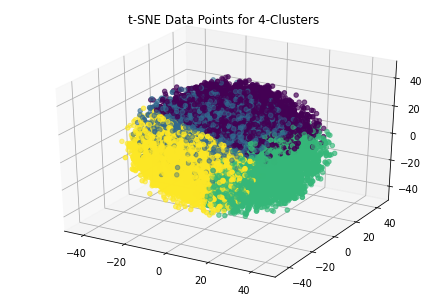

In [65]:
# static style 4-cluster
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(to_cluster[0], to_cluster[1], to_cluster[2], c=preds4)
plt.title("t-SNE Data Points for 4-Clusters")

plt.savefig("/content/tsne_4clusters.png")
plt.show()

In [66]:
files.download("/content/tsne_4clusters.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

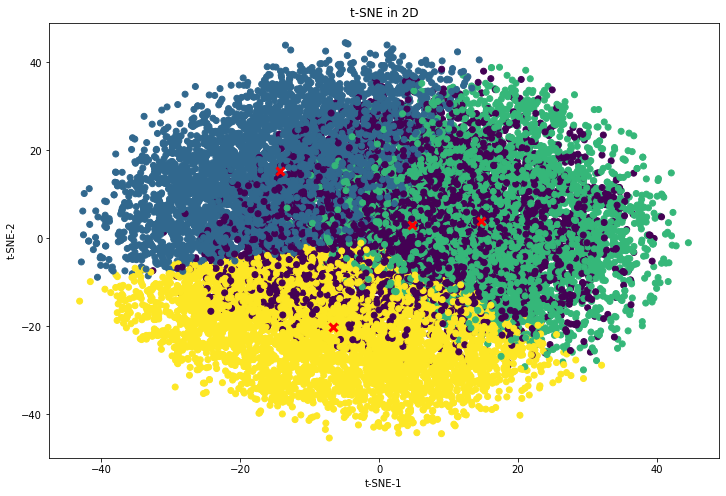

In [69]:
plt.figure(figsize=(12, 8))

plt.scatter(to_cluster[0], to_cluster[1], c=preds4)

for c in centers4:
  plt.plot(c[0], c[1], markersize=8, color="red", marker="x", mew=3)

plt.xlabel("t-SNE-1")
plt.ylabel("t-SNE-2")

plt.title("t-SNE in 2D")

plt.savefig("/content/tsne_4clusters_centers.png")
plt.show()

In [70]:
files.download("/content/tsne_4clusters_centers.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Concat Cluster Results with Main Table

In [71]:
tsne_anime_clusters = df
tsne_anime_clusters["cluster"] = preds4
tsne_anime_clusters.head()

,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,.hack//Liminality,...,iDOLM@STER Xenoglossia Specials,lilac (bombs Jun Togawa),makemagic,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


## Extract Each Cluster and Observe Animes

In [73]:
# there are four clusters = c0, c1, c2 and c3
# extract mean ratings for every anime for every cluster
c0 = tsne_anime_clusters[tsne_anime_clusters.cluster == 0].drop("cluster", axis=1).mean()
c1 = tsne_anime_clusters[tsne_anime_clusters.cluster == 1].drop("cluster", axis=1).mean()
c2 = tsne_anime_clusters[tsne_anime_clusters.cluster == 2].drop("cluster", axis=1).mean()
c3 = tsne_anime_clusters[tsne_anime_clusters.cluster == 3].drop("cluster", axis=1).mean()

In [74]:
print("Length of Cluster-1:", len(c0))
print("Length of Cluster-2:", len(c1))
print("Length of Cluster-3:", len(c2))
print("Length of Cluster-4:", len(c3))

Length of Cluster-1: 7852
Length of Cluster-2: 7852
Length of Cluster-3: 7852
Length of Cluster-4: 7852


In [75]:
print("CLUSTER-1")
print("*" * 10)
c0.sort_values(ascending=False)[:20]

CLUSTER-1
**********


Shingeki no Kyojin                    0.737802
Death Note                            0.627921
Fullmetal Alchemist: Brotherhood      0.583436
Steins;Gate                           0.540795
Code Geass: Hangyaku no Lelouch       0.523370
Sword Art Online                      0.520500
Code Geass: Hangyaku no Lelouch R2    0.504100
No Game No Life                       0.478680
Angel Beats!                          0.434809
Mirai Nikki (TV)                      0.399549
One Punch Man                         0.399139
Fate/Zero                             0.387249
Tokyo Ghoul                           0.375769
Fate/Zero 2nd Season                  0.366134
Psycho-Pass                           0.364904
Tengen Toppa Gurren Lagann            0.360189
Toradora!                             0.358754
Kiseijuu: Sei no Kakuritsu            0.355269
Noragami                              0.347068
Durarara!!                            0.329028
dtype: float64

In [76]:
print("CLUSTER-2")
print("*" * 10)
c1.sort_values(ascending=False)[:20]

CLUSTER-2
**********


Angel Beats!                                                0.442187
Sword Art Online                                            0.425546
Clannad                                                     0.388156
Toradora!                                                   0.357251
Clannad: After Story                                        0.355954
Death Note                                                  0.334558
Code Geass: Hangyaku no Lelouch                             0.303869
Mirai Nikki (TV)                                            0.288956
Elfen Lied                                                  0.276637
Shingeki no Kyojin                                          0.276205
Code Geass: Hangyaku no Lelouch R2                          0.265183
Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai.    0.235142
No Game No Life                                             0.215258
Highschool of the Dead                                      0.210720
Sakurasou no Pet na Kanojo        

In [77]:
print("CLUSTER-3")
print("*" * 10)
c2.sort_values(ascending=False)[:20]

CLUSTER-3
**********


Death Note                          0.231369
Naruto                              0.187833
Dragon Ball Z                       0.175856
Fullmetal Alchemist: Brotherhood    0.171673
Fullmetal Alchemist                 0.159316
Dragon Ball                         0.143916
Shingeki no Kyojin                  0.141635
Elfen Lied                          0.121293
Cowboy Bebop                        0.121293
Tengen Toppa Gurren Lagann          0.115019
Sword Art Online                    0.102281
Soul Eater                          0.101901
Bleach                              0.099240
Samurai Champloo                    0.097909
Ao no Exorcist                      0.096198
Sen to Chihiro no Kamikakushi       0.082510
Angel Beats!                        0.081939
Fairy Tail                          0.080989
Trigun                              0.078897
Mahou Shoujo Madoka★Magica          0.078137
dtype: float64

In [78]:
print("CLUSTER-4")
print("*" * 10)
c3.sort_values(ascending=False)[:20]

CLUSTER-4
**********


Death Note                            0.480802
Sen to Chihiro no Kamikakushi         0.451576
Howl no Ugoku Shiro                   0.377650
Ouran Koukou Host Club                0.373066
Code Geass: Hangyaku no Lelouch       0.337727
Mononoke Hime                         0.324546
Fullmetal Alchemist                   0.307163
Code Geass: Hangyaku no Lelouch R2    0.295320
Neon Genesis Evangelion               0.280802
Tonari no Totoro                      0.262082
Shingeki no Kyojin                    0.242789
Kuroshitsuji                          0.242598
Fullmetal Alchemist: Brotherhood      0.234766
Elfen Lied                            0.234002
Cowboy Bebop                          0.229990
Toradora!                             0.223305
Toki wo Kakeru Shoujo                 0.217574
Vampire Knight                        0.216428
Tengen Toppa Gurren Lagann            0.204202
Suzumiya Haruhi no Yuuutsu            0.203820
dtype: float64


> I think, results of t-SNE >>>> PCA !!




In [79]:
d= { "Point" : list(c0.values) + list(c1.values) + list(c2.values) + list(c3.values),
      "AnimeName" : list(c0.index) + list(c1.index) + list(c2.index) + list(c3.index),
      "ClusterType" : [1] * len(c0) + [2] * len(c1) + [3] * len(c2) + [4] * len(c3)
}

clustered_anime_tsne = pd.DataFrame(d, columns=["AnimeName", "ClusterType", "Point"])
clustered_anime_tsne.head()

,AnimeName,ClusterType,Point
0,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hat...,1,0.006150
1,&quot;Bungaku Shoujo&quot; Memoire,1,0.007585
2,&quot;Bungaku Shoujo&quot; Movie,1,0.017425
3,&quot;Eiji&quot;,1,0.000000
4,.hack//G.U. Returner,1,0.001640


In [80]:
# save files
tsne_anime_clusters.to_csv("/content/tsne_anime_clusters.csv")
files.download("/content/tsne_anime_clusters.csv")

clustered_anime_tsne.to_csv("/content/clustered_anime_tsne.csv")
files.download("/content/clustered_anime_tsne.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>